In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        os.path.join(dirname, filename)

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import os
from tqdm import tqdm

In [6]:
DATADIR = 'C:/Users/hp/Downloads/archive (3)/ColorClassification'
CATEGORIES = ['orange','Violet','red','Blue','Green','Black','Brown','White']
IMG_SIZE=100

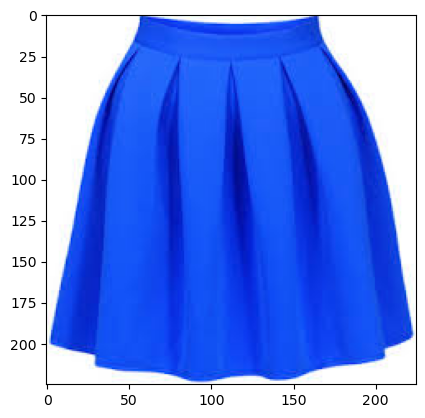

In [7]:
for category in CATEGORIES:
    path=os.path.join(DATADIR, category)
    for img in os.listdir(path):
        img_array=cv2.imread(os.path.join(path,img))
        plt.imshow(img_array)
        plt.show()
        break
    break

In [8]:
training_data=[]
def create_training_data():
    for category in CATEGORIES:
        path=os.path.join(DATADIR, category)
        class_num=CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array=cv2.imread(os.path.join(path,img))
                new_array=cv2.resize(img_array,(IMG_SIZE,IMG_SIZE))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass
create_training_data()            

In [9]:
print(len(training_data))

107


In [10]:
lenofimage = len(training_data)

In [11]:
X=[]
y=[]

for categories, label in training_data:
    X.append(categories)
    y.append(label)
X= np.array(X).reshape(lenofimage,-1)
##X = tf.keras.utils.normalize(X, axis = 1)

In [12]:
X.shape

(107, 30000)

In [13]:
X = X/255.0

In [14]:
X[1]

array([1., 1., 1., ..., 1., 1., 1.])

In [15]:
y=np.array(y)

In [16]:
y.shape

(107,)

In [17]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y)


In [18]:
from sklearn.svm import SVC
svc = SVC(kernel='linear',gamma='auto')
svc.fit(X_train, y_train)

SVC(gamma='auto', kernel='linear')

In [19]:
y2 = svc.predict(X_test)

In [20]:
from sklearn.metrics import accuracy_score
print("Accuracy on unknown data is",accuracy_score(y_test,y2))

Accuracy on unknown data is 0.8148148148148148


In [21]:
from sklearn.metrics import classification_report
print("Accuracy on unknown data is",classification_report(y_test,y2))

Accuracy on unknown data is               precision    recall  f1-score   support

           0       1.00      0.50      0.67         2
           1       0.67      0.67      0.67         3
           2       1.00      0.75      0.86         4
           3       0.67      1.00      0.80         2
           4       1.00      1.00      1.00         2
           5       1.00      0.50      0.67         4
           6       0.57      1.00      0.73         4
           7       1.00      1.00      1.00         6

    accuracy                           0.81        27
   macro avg       0.86      0.80      0.80        27
weighted avg       0.87      0.81      0.81        27



In [22]:
result = pd.DataFrame({'original' : y_test,'predicted' : y2})

In [23]:
result

,original,predicted
0,0,0
1,1,1
2,2,2
3,7,7
4,6,6
5,5,3
6,2,2
7,5,1
8,1,6
9,7,7
